In [93]:
# Importing Libraries

import pandas as pd

import numpy as np
import os
import posixpath
import glob
import random

from PIL import Image
from PIL.Image import Resampling
from tensorflow.keras.utils import Sequence

import matplotlib.pyplot as plt

from keras.utils import load_img, img_to_array

In [94]:
# Initializing and declaring path of images

test_dir = "Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test"
train_dir = "Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train"
val_dir = "Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val"

In [95]:
# Setting Variables

img_height, img_width = 250, 250
classifiers = ['fractured', 'not fractured']

In [96]:
def import_data(dataset, data):
    X = []
    y = []
    for i in range(2):
        path = os.path.normpath(os.path.join(data, classifiers[i]))
        path = path.replace("\\", "/")

        for img in os.listdir(path):
            try:
                loaded_img = load_img(os.path.join(path, img), color_mode="grayscale")
                loaded_img = loaded_img.resize((img_width, img_height), resample = Resampling.BICUBIC)
                img_arr = img_to_array(loaded_img)
                img_arr = img_arr.reshape(img_width, img_height, 1).astype("float32")
                X.append(img_arr)
                y.append(i)
                dataset.append([loaded_img, classifiers[i]])
            except:
                pass
    
    random.shuffle(dataset)

    return np.array(X), np.array(y)

In [97]:
train_df = []
X_train, y_train = import_data(train_df, train_dir)

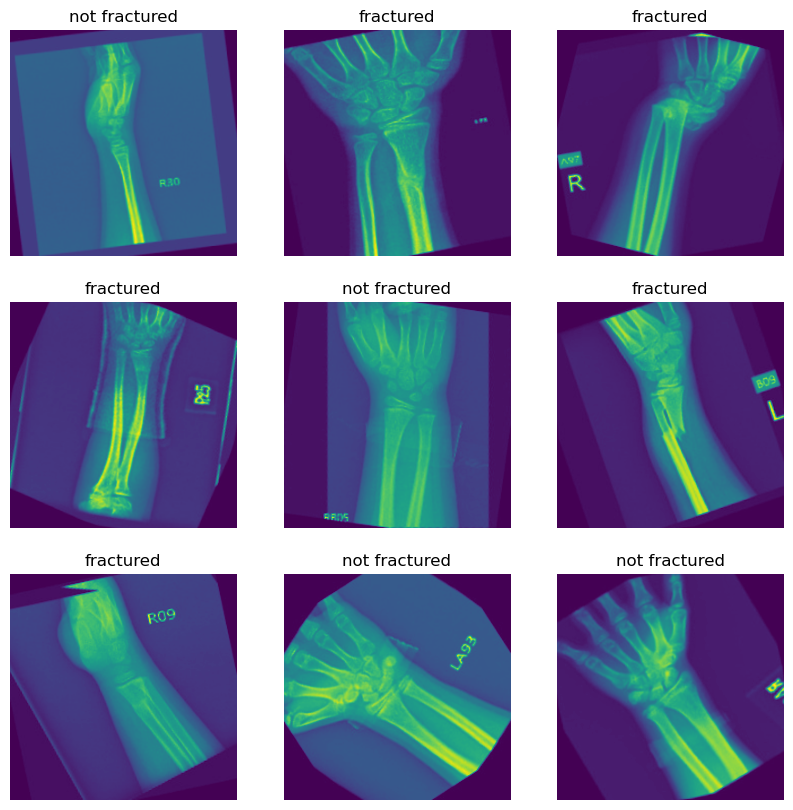

In [98]:
train_df = pd.DataFrame(train_df,columns=['image','label'])

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(train_df.image[i])
    plt.title(train_df.label[i])
    plt.axis("off")

# plt.tight_layout()
# plt.show()